<a href="https://colab.research.google.com/github/rajthakkar18/AirBNB-Booking-Database/blob/main/Predicting_IPL_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1fBdQL13-rWTU7hph9MKKwSN1P13-SKZO/view?usp=drive_link

In [1]:
!gdown 1fBdQL13-rWTU7hph9MKKwSN1P13-SKZO

Downloading...
From: https://drive.google.com/uc?id=1fBdQL13-rWTU7hph9MKKwSN1P13-SKZO
To: /content/ipl.csv
100% 9.41M/9.41M [00:00<00:00, 54.8MB/s]


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the IPL dataset
df =  pd.read_csv('/content/ipl.csv')
print(df.shape)
df.head()

(76014, 15)


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.isnull().sum()  #checking null values in every column

,0
mid,0
date,0
venue,0
bat_team,0
bowl_team,0
batsman,0
bowler,0
runs,0
wickets,0
overs,0


We see that the dataset has no null values.

In [5]:
df.dtypes  #checking the datatypes of every column so that we can do relevant computations

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


We see that the datatype of "date" column is not in datetime format.

In [6]:
# Check the type of the date column
print(df['date'].dtype)

# Convert to datetime if needed
df['date'] = pd.to_datetime(df['date'])

# Verify conversion
print(df['date'].dtype)  # Should now show dtype('datetime64[ns]')


object
datetime64[ns]


In [7]:
#Identifying categorical and continous variables for clarity

categorical_variables = df.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_variables = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the results
print("Categorical Variables:", categorical_variables)
print("Continuous Variables:", continuous_variables)

Categorical Variables: ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']
Continuous Variables: ['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total']


In [8]:
df.describe()

,mid,date,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,2012-10-19 23:24:15.174046976,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
min,1.000000,2008-04-18 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,2010-04-11 00:00:00,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,2012-05-20 00:00:00,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,2015-04-19 00:00:00,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,2017-05-21 00:00:00,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000
std,178.156878,NaN,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231


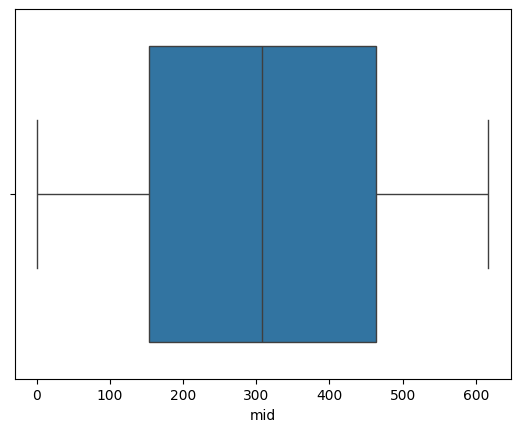

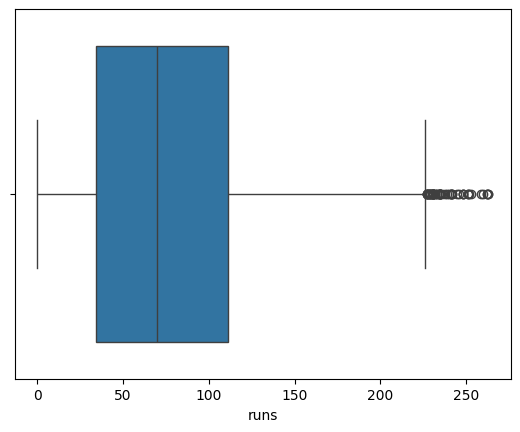

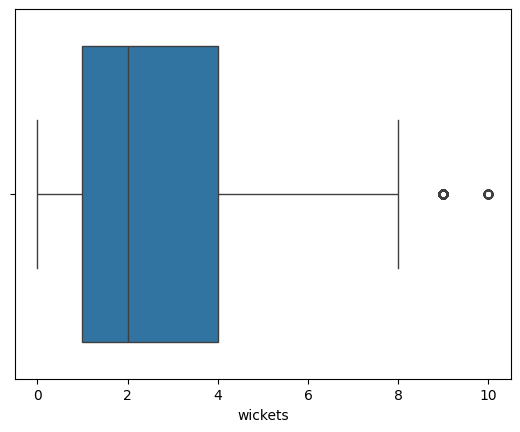

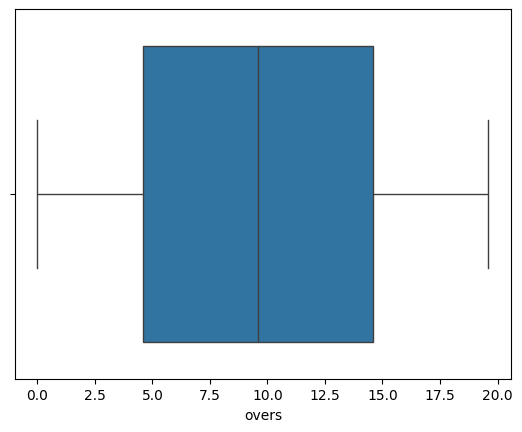

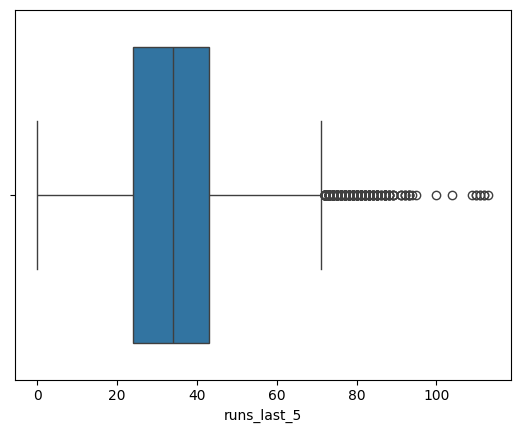

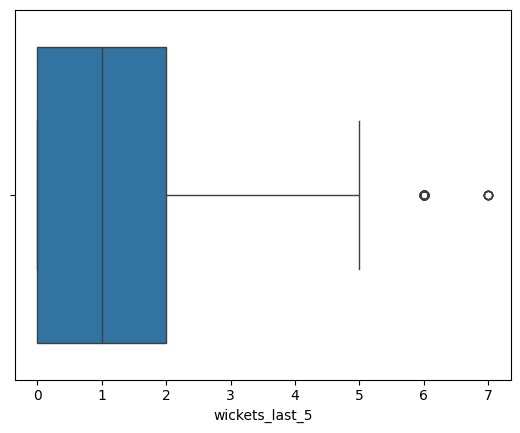

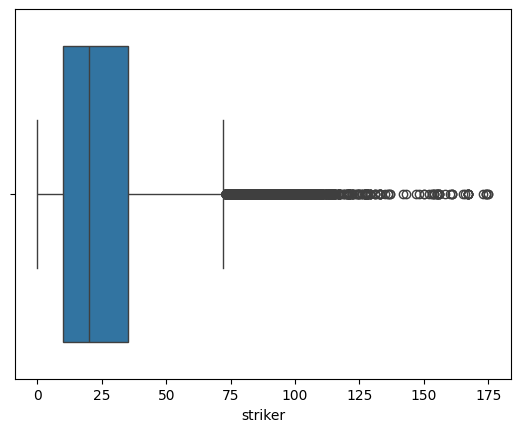

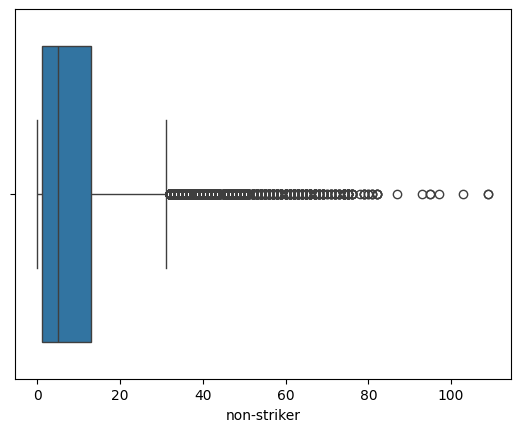

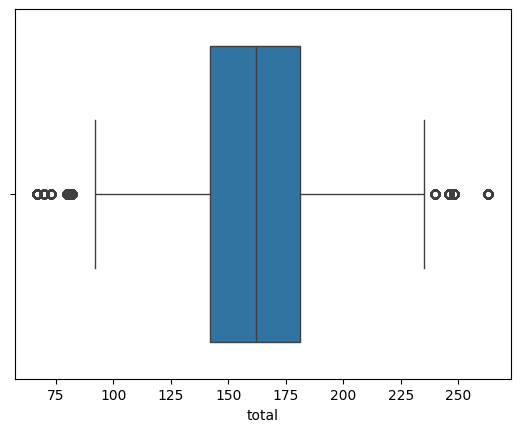

In [9]:
#Plotting boxplots of continous variables to understand their centrality and spread

for col in continuous_variables:
    sns.boxplot(x=df[col])
    plt.show()



*   We see that there are many outliers in "runs" which can be understood by high scoring games.
*   "Wickets" has a few outliers meaning that in only few games, the team lost more than 8 wickets.


*   There are many outliers in last 5 overs columns as well which means that the last 5 overs are for hard hitting.
*   Likewise there are few outliers in "Last 5 wickets" which just means that there were few instances when the team lost more than 5 wickets in final 5 overs.





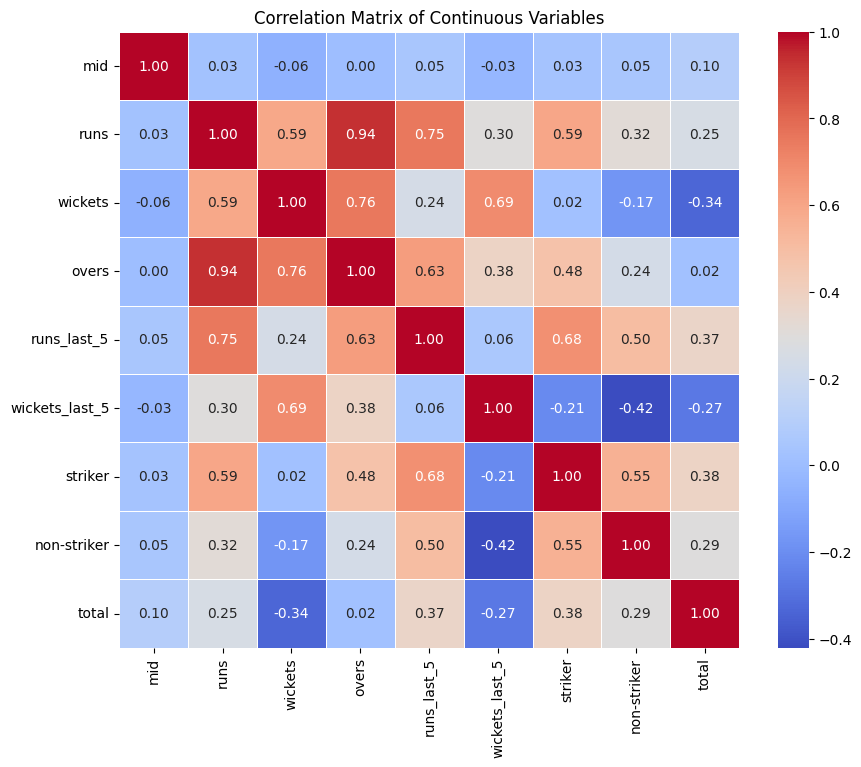

In [11]:
#Plotting correlation matrix to understand the relation of different variables with each other and also with the target variable "total"

import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
correlation_matrix = df[continuous_variables].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()




* "runs_last_5" and "striker" show a moderate positive correlation (0.68), suggesting that the striker's performance influences runs scored in the last five overs.
* "overs" and "wickets" have a moderate positive correlation (0.76), implying that as overs progress, more wickets tend to fall.

* "total" and "wickets" have a negative correlation (-0.34), suggesting that total runs may decrease when wickets fall frequently.
* Strong correlations between overs, runs, and wickets indicate that balancing aggressive scoring with wicket conservation is crucial for maximizing team performance.





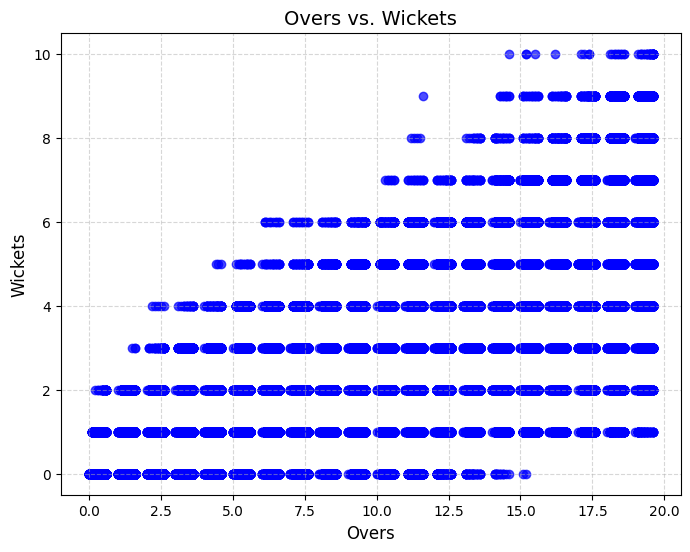

In [12]:
import matplotlib.pyplot as plt

# Scatter plot between overs and wickets
plt.figure(figsize=(8, 6))
plt.scatter(df['overs'], df['wickets'], color='blue', alpha=0.7)
plt.title('Overs vs. Wickets', fontsize=14)
plt.xlabel('Overs', fontsize=12)
plt.ylabel('Wickets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


As the overs progress, there is a tendency that teh wickets will fell too.

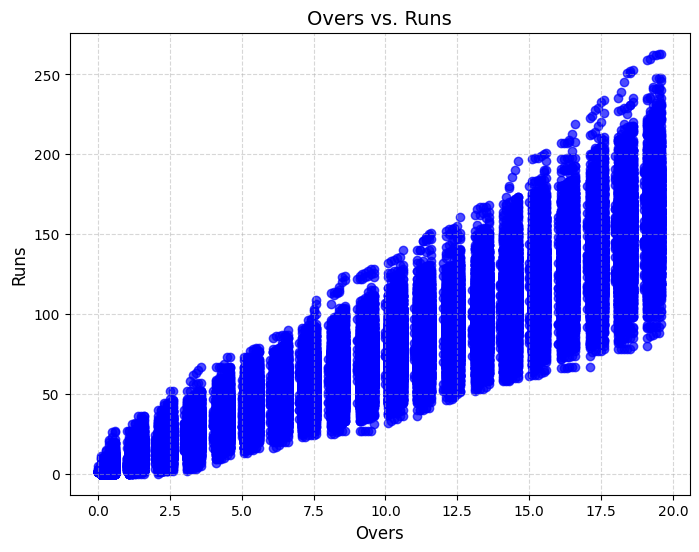

In [13]:
import matplotlib.pyplot as plt

# Scatter plot between overs and Runs
plt.figure(figsize=(8, 6))
plt.scatter(df['overs'], df['runs'], color='blue', alpha=0.7)
plt.title('Overs vs. Runs', fontsize=14)
plt.xlabel('Overs', fontsize=12)
plt.ylabel('Runs', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


This is a pretty starightforward observation that as the overs progresses the runs also increase.

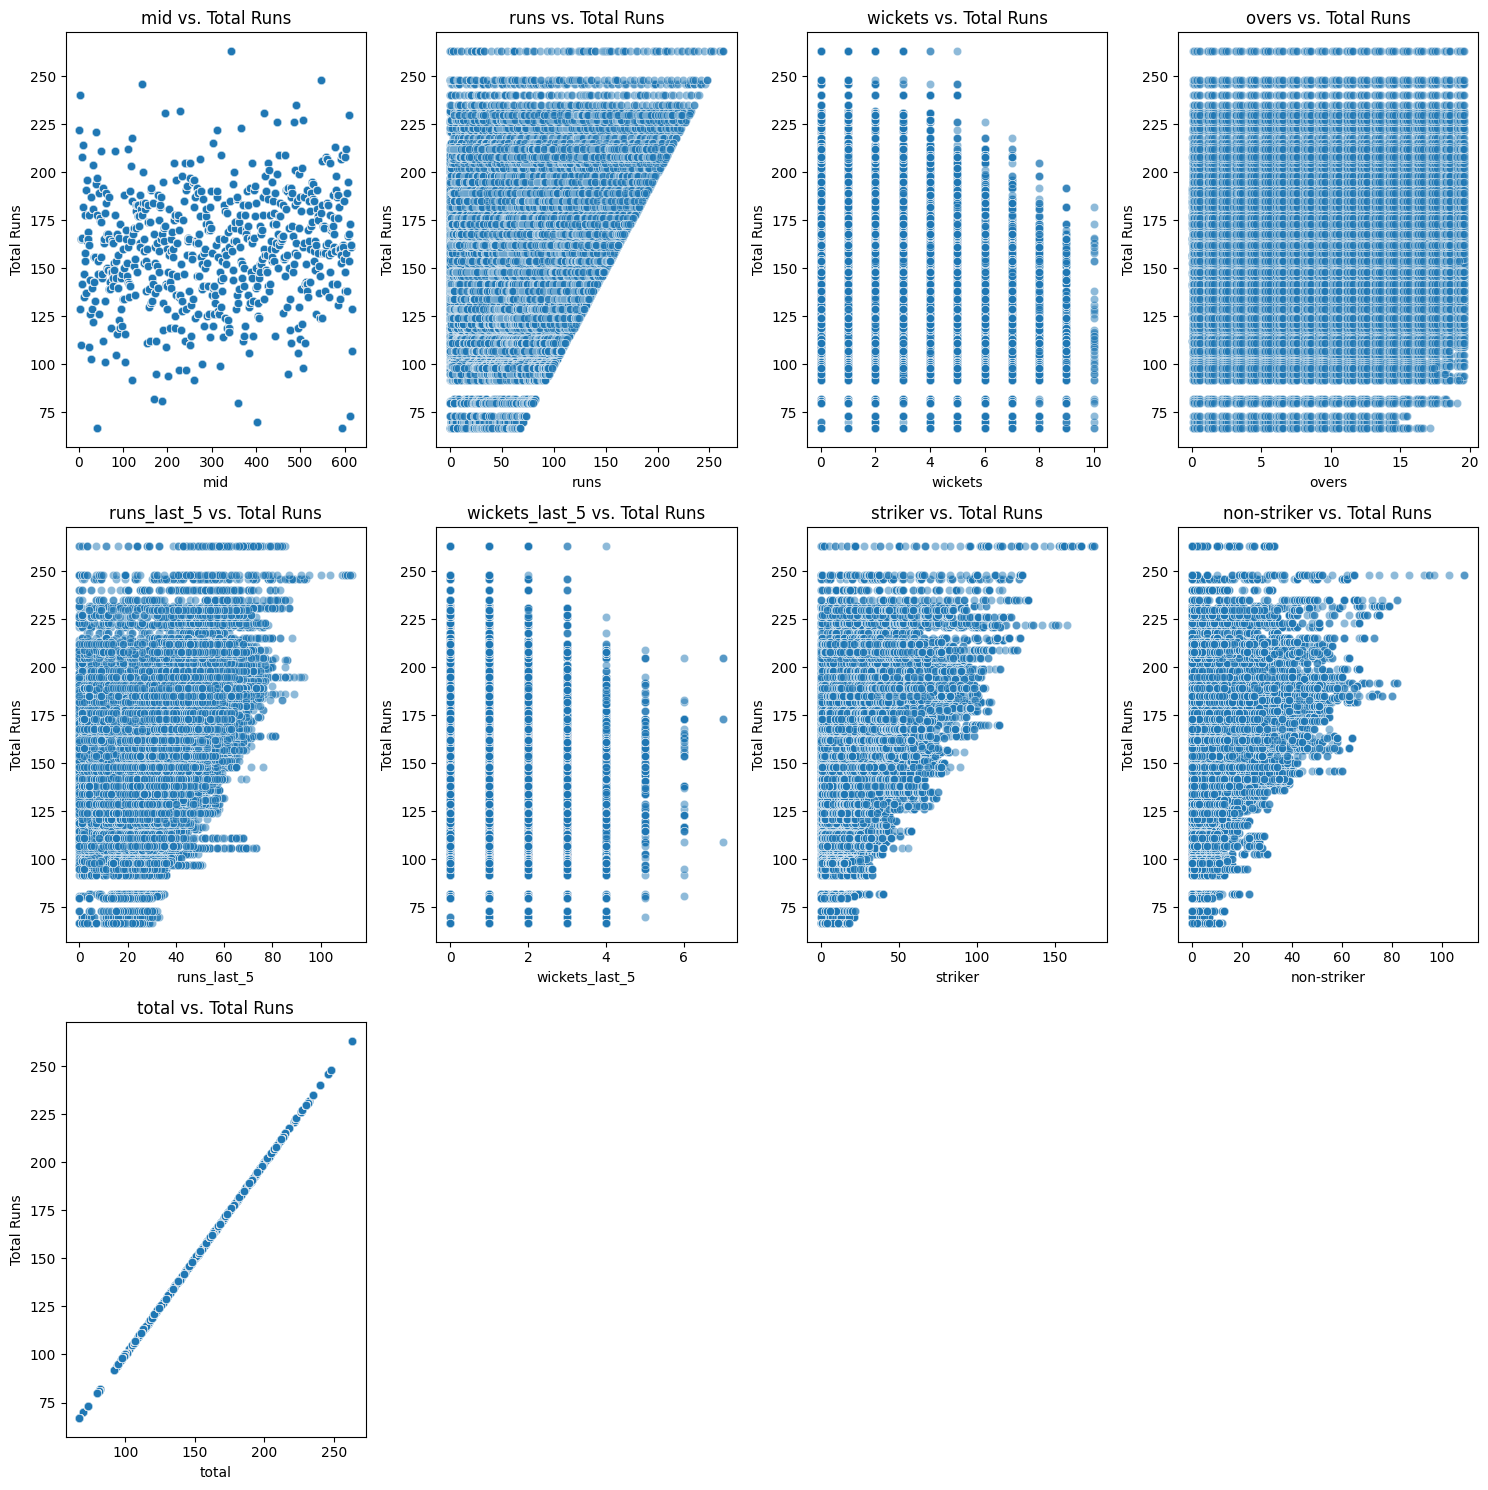

In [14]:
import math

# Calculate the number of rows needed for 4 plots in each row
ncols = 4
nrows = math.ceil(len(continuous_variables) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes to iterate easily

for i, column in enumerate(continuous_variables):
    sns.scatterplot(x=df[column], y=df['total'], ax=axes[i], alpha=0.5)  # Add transparency
    axes[i].set_title(f'{column} vs. Total Runs')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Total Runs')

# Hide any unused subplots
for j in range(len(continuous_variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


We have a scatterplot for understanding the relations between continous variables and the target variable. We see that some variables are directly related whereas some are not.

In [15]:
#Checking the unique values in categorical columns for further computations.

for col in categorical_variables:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 50)  # Separator for readability


Column: venue
venue
M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saur

In [16]:
# Temporarily adjust display options to show all rows
# To understand further, we check the number of times every unique value appears

with pd.option_context('display.max_rows', None):
    print(df[['batsman','bowler']].value_counts())


batsman               bowler           
V Kohli               R Ashwin             73
SK Raina              Harbhajan Singh      72
V Kohli               DJ Bravo             66
RG Sharma             UT Yadav             64
MS Dhoni              PP Ojha              62
SK Raina              PP Chawla            60
CH Gayle              P Kumar              59
V Kohli               PP Chawla            57
JH Kallis             PP Ojha              56
CH Gayle              Harbhajan Singh      53
S Dhawan              Harbhajan Singh      53
V Kohli               RA Jadeja            52
                      P Kumar              52
BB McCullum           Z Khan               51
DA Warner             Harbhajan Singh      51
RG Sharma             PP Chawla            51
KA Pollard            DJ Bravo             51
S Dhawan              M Morkel             50
SK Raina              UT Yadav             50
DA Warner             J Yadav              50
S Dhawan              P Kumar           

In [17]:
# Drop the irrelevant columns
df = df.drop(['mid', 'bowler', 'batsman'], axis=1)

# Display the updated DataFrame structure
df.head()


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,222


In [18]:
# Perform one-hot encoding on 'venue', 'bat_team', and 'bowl_team'
df_encoded = pd.get_dummies(df, columns=['venue', 'bat_team', 'bowl_team'], drop_first=True)

# Display the updated DataFrame
df_encoded.head()


,date,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,venue_Brabourne Stadium,...,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiant,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,1,0,0.1,1,0,0,0,222,False,...,False,False,False,False,False,False,False,False,True,False
1,2008-04-18,1,0,0.2,1,0,0,0,222,False,...,False,False,False,False,False,False,False,False,True,False
2,2008-04-18,2,0,0.2,2,0,0,0,222,False,...,False,False,False,False,False,False,False,False,True,False
3,2008-04-18,2,0,0.3,2,0,0,0,222,False,...,False,False,False,False,False,False,False,False,True,False
4,2008-04-18,2,0,0.4,2,0,0,0,222,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
#Data Preparation

from sklearn.model_selection import train_test_split

# Define the target variable
X = df_encoded.drop(columns=['total', 'date'])  # Drop the target column and any unnecessary columns
y = df_encoded['total']  # Target: 'total'

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Importing Required Libraries
# Linear and regularized regression models

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [21]:
# Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_test = model.predict(X_test)

    # Make predictions on the train set
    y_pred_train = model.predict(X_train)

    # Evaluate the model for the train set
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Evaluate the model for the test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Return results for both train and test sets
    return {
        'mae_train': mae_train, 'mse_train': mse_train, 'r2_train': r2_train,
        'mae_test': mae_test, 'mse_test': mse_test, 'r2_test': r2_test
    }



In [22]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror')
}

# Evaluate each model and store results
results = {}
for name, model in models.items():
    # Get the results dictionary from evaluate_model
    model_results = evaluate_model(model, X_train, X_test, y_train, y_test)

    # Extract desired metrics for test and train sets
    mae_test = model_results['mae_test']
    mse_test = model_results['mse_test']
    r2_test = model_results['r2_test']

    mae_train = model_results['mae_train']
    mse_train = model_results['mse_train']
    r2_train = model_results['r2_train']

    # Store results for both train and test sets
    results[name] = {
        "MAE_test": mae_test, "MSE_test": mse_test, "R2_test": r2_test,
        "MAE_train": mae_train, "MSE_train": mse_train, "R2_train": r2_train
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                    MAE_test    MSE_test   R2_test  MAE_train   MSE_train  \
Linear Regression  14.412822  374.491554  0.556022  14.731824  391.071832   
Lasso Regression   14.837366  405.963223  0.518711  15.202816  427.204809   
Ridge Regression   14.411319  374.481307  0.556034  14.730524  391.073430   
Random Forest       3.700221   50.992370  0.939546   1.462859    9.366549   
XGBoost             8.504310  154.334534  0.817029   7.971884  138.042557   

                   R2_train  
Linear Regression  0.544352  
Lasso Regression   0.502252  
Ridge Regression   0.544350  
Random Forest      0.989087  
XGBoost            0.839163  




* Random Forest outperforms all other models, with the lowest MAE and MSE on both the test (3.70, 50.99) and train sets (1.46, 9.37), along with the highest R² on both sets (test: 0.940, train: 0.989), indicating it explains most of the variance in the data.
* XGBoost delivers strong performance, especially on the test set (MAE: 8.50, MSE: 154.33, R²: 0.817), compared to R² on the train set which is lower (0.839).


* Linear, Ridge, and Lasso Regression models perform similarly, with higher MAE and MSE values and lower R² (test: ~0.56), indicating they are less effective for the given data compared to the tree-based models.





In [23]:
# Checking overfitting with the help of cross validation

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive values
cv_scores = -cv_scores

# Print the cross-validation results
print(f"Cross-validation MSE scores: {cv_scores}")
print(f"Mean Cross-validation MSE: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-validation MSE: {np.std(cv_scores)}")


Cross-validation MSE scores: [69.30648695 66.96999111 68.99680182 74.19178892 65.74152681]
Mean Cross-validation MSE: 69.04131912234945
Standard Deviation of Cross-validation MSE: 2.890628441653197


The model shows stability, with a consistent MSE across folds. The low standard deviation suggests that the model is not prone to overfitting or high variance, which indicates good generalization capability.

In [24]:
# Hyperparameter Tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Corrected parameter grid for Random Forest
param_dist_optimized = {
    "n_estimators": [100, 200, 300],         # Reduced values for number of trees
    "max_features": [None, 'sqrt', 'log2'], # Replace 'auto' with None
    "max_depth": [None, 10, 30, 50],        # Limited depth options
    "min_samples_split": [2, 5],            # Reduced split options
    "min_samples_leaf": [1, 2],             # Reduced leaf options
    "bootstrap": [True, False],             # Keep both options
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_optimized,
    n_iter=10,
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best score and parameters
print(f"Best R^2 Score: {random_search.best_score_}")
print(f"Best Parameters: {random_search.best_params_}")


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best R^2 Score: 0.922870155610697
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


The Random Forest model achieved an impressive R² score of 0.98 without hyperparameter tuning, which slightly dropped to 0.92 after applying RandomizedSearchCV. This suggests that the default configuration was already well-suited for the task, and hyperparameter optimization did not yield significant improvements in this case.

In [25]:
#Comparing the model's performance with actual predictions

import pandas as pd

# Fit the rf_model before making predictions
rf_model.fit(X_train, y_train)  # Add this line to fit the model

# Get the predictions on the test set using the Random Forest model
y_pred = rf_model.predict(X_test)  # Assuming rf_model is your trained Random Forest model

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,   # Replace y_test with your test target variable
    'Predicted': y_pred
})

# Display the DataFrame
print(results_df)

# Save the DataFrame to a CSV file (optional)
results_df.to_csv('predicted_vs_actual.csv', index=False)

       Actual  Predicted
12590     134     134.95
74893     195     193.22
56763     183     180.27
19428     183     177.68
30216     193     184.57
...       ...        ...
6519      192     190.67
72043     188     186.84
70116     170     170.18
61737     139     135.81
68640     162     161.36

[15203 rows x 2 columns]


The actual and predicted values appear to be very close, indicating that the model performs well in making predictions on the test set, as the difference between actual and predicted values is minimal for most rows.